In [1]:
%matplotlib qt

Channels marked as bad:
none
Channels marked as bad:
none


Extracting EDF parameters from C:\Users\Aakif Khan\mne_data\MNE-eegbci-data\files\eegmmidb\1.0.0\S001\S001R06.edf...
Setting channel info structure...


C:\Users\Aakif Khan\EEG-Artifact-Removal-ICA\eeg\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Using matplotlib as 2D backend.


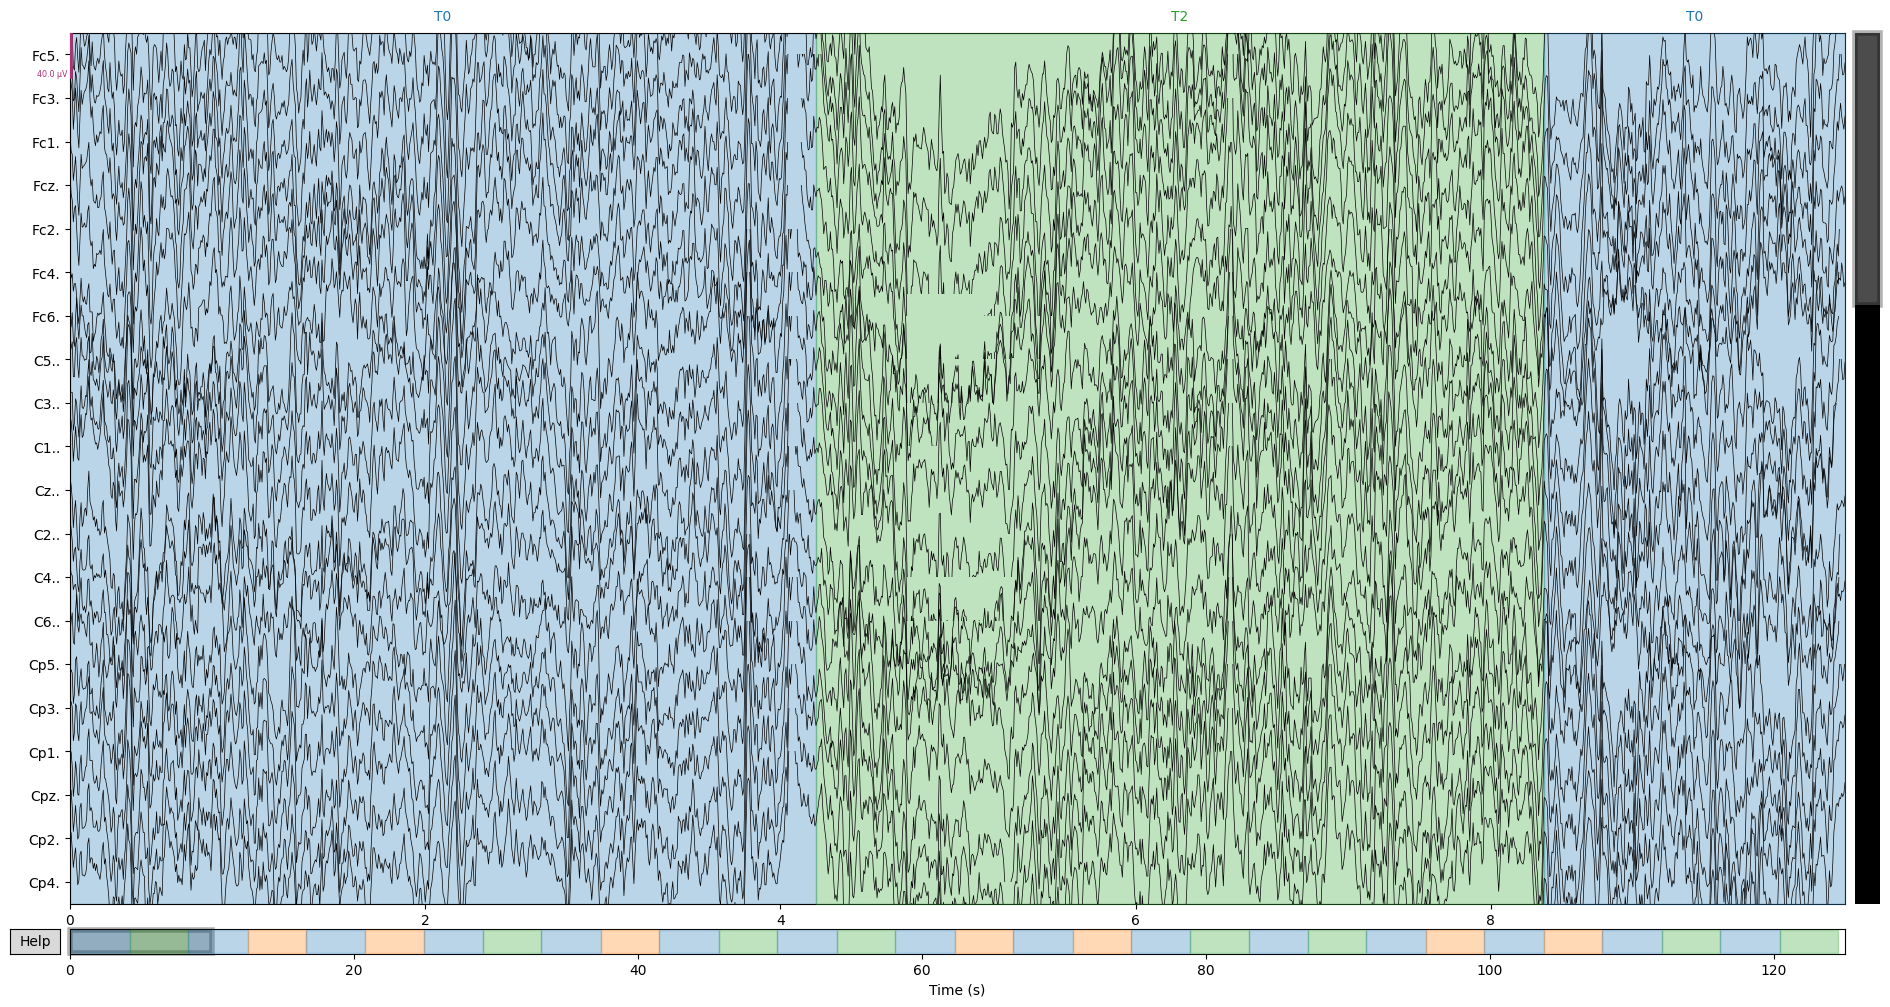

In [2]:
import mne
from mne.datasets import eegbci

subject = 1
runs = [6]

files = eegbci.load_data(subject, runs)
raw = mne.io.read_raw_edf(files[0], preload=True)

%matplotlib qt

raw.plot()

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 529 samples (3.306 s)



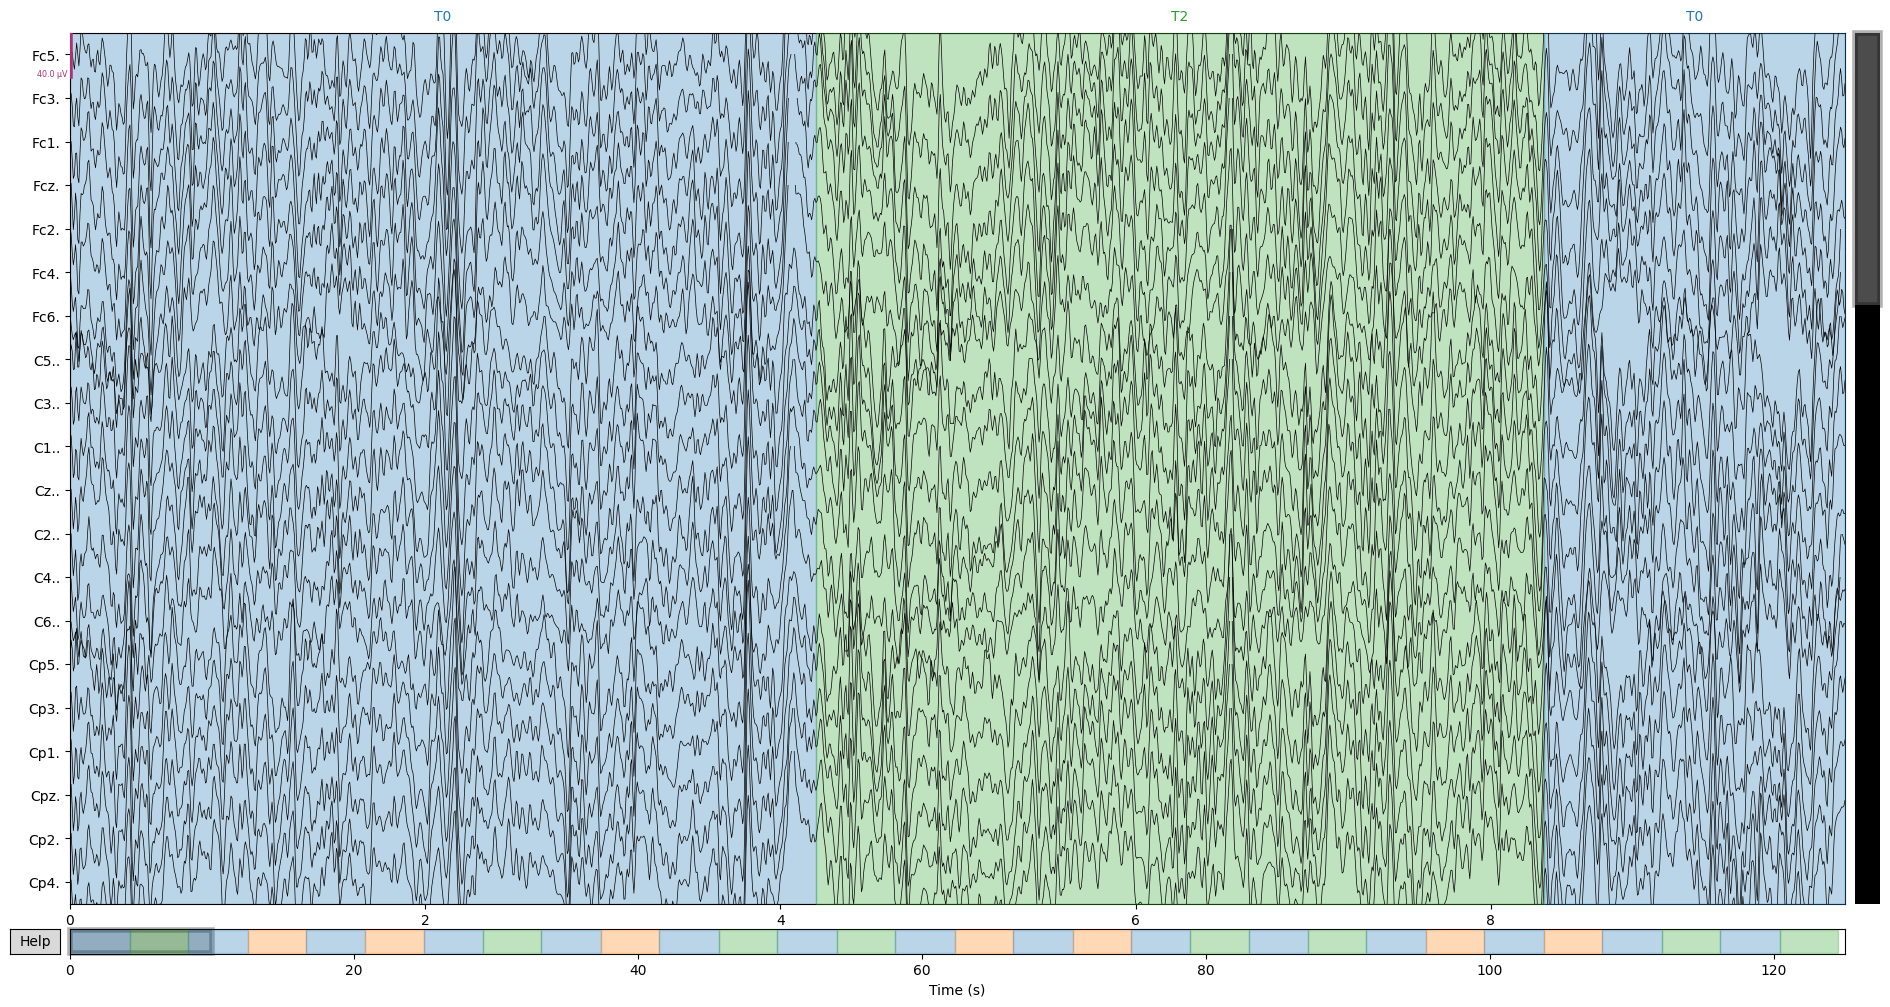

In [3]:
raw.filter(1., 40.)
raw.plot()

In [5]:
# remove trailing dots from channel names
raw.rename_channels(lambda s: s.strip('.'))

<RawEDF | S001R06.edf, 64 x 20000 (125.0 s), ~9.8 MiB, data loaded>

Fitting ICA to data using 64 channels (please be patient, this may take a while)
Selecting by number: 15 components
Fitting ICA took 0.3s.
Creating RawArray with float64 data, n_channels=15, n_times=20000
    Range : 0 ... 19999 =      0.000 ...   124.994 secs
Ready.


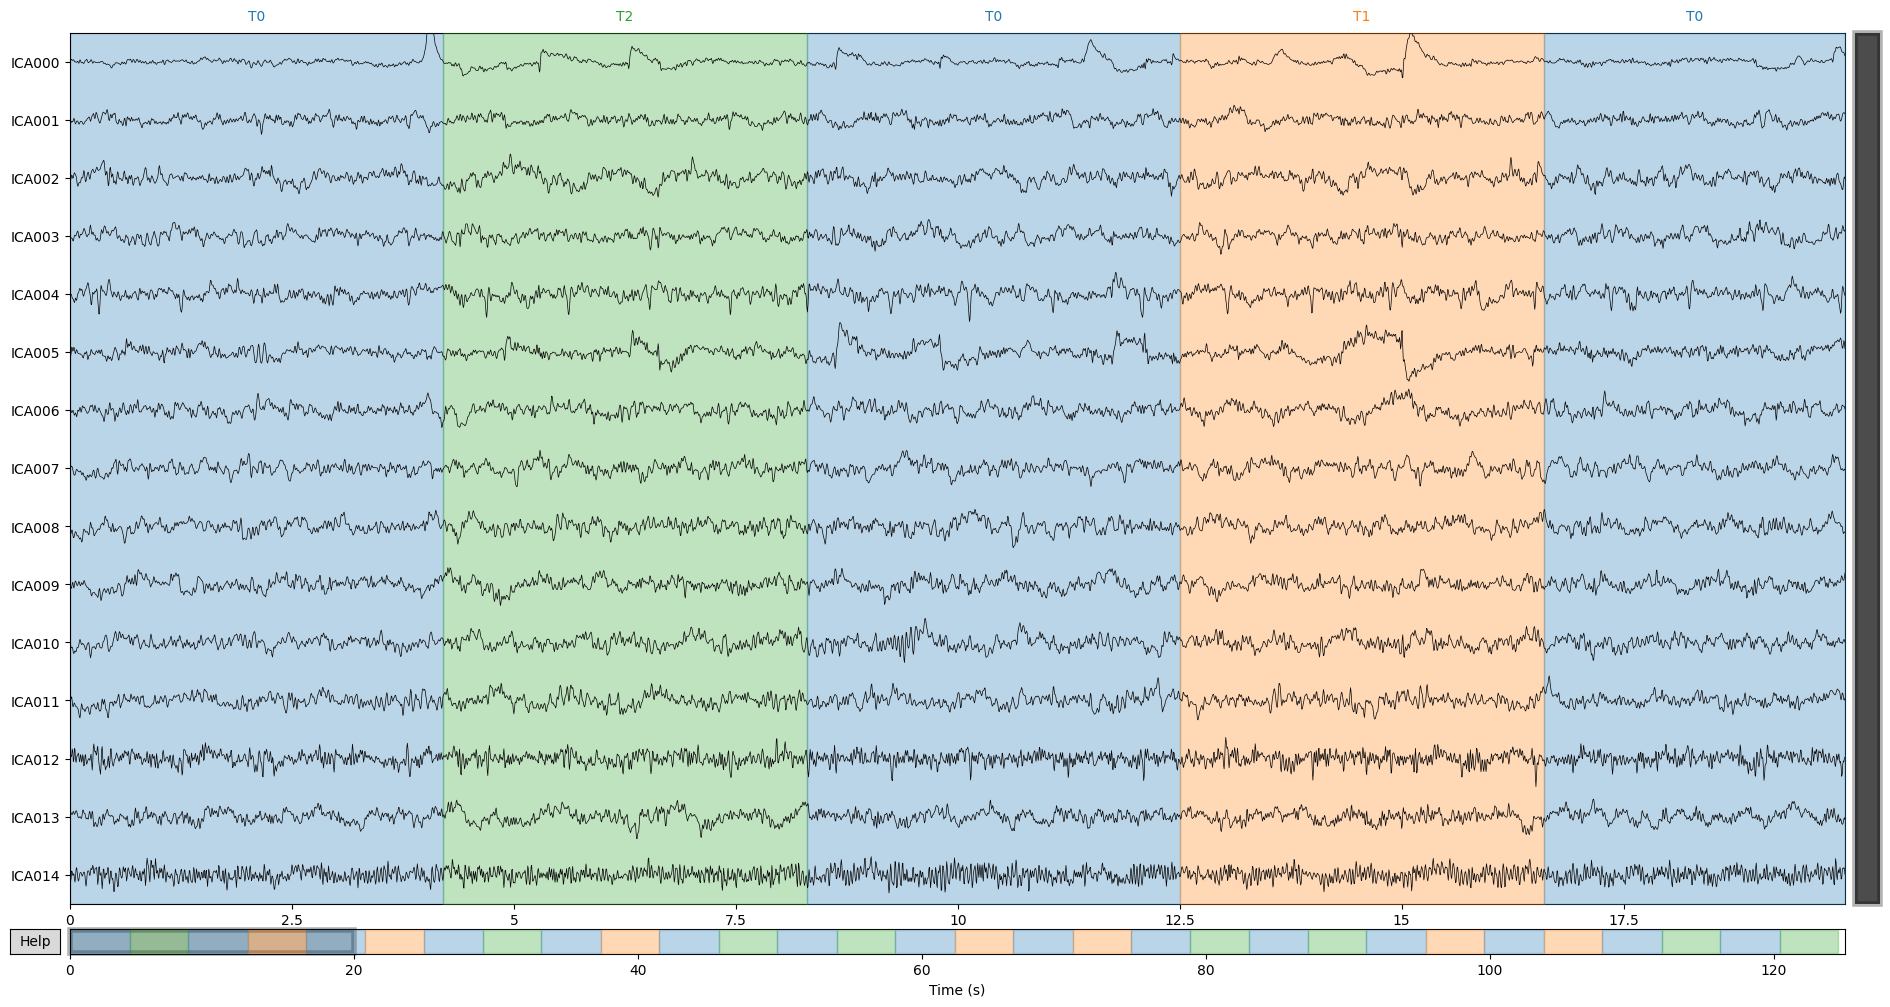

In [8]:
from mne.preprocessing import ICA

# set electrode positions
raw.set_montage('standard_1020', on_missing='ignore')
# build ICA model
ica = ICA(n_components=15, random_state=97, max_iter=800)
ica.fit(raw)

# show components
ica.plot_sources(raw)

Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 1 ICA component
    Projecting back using 64 PCA components


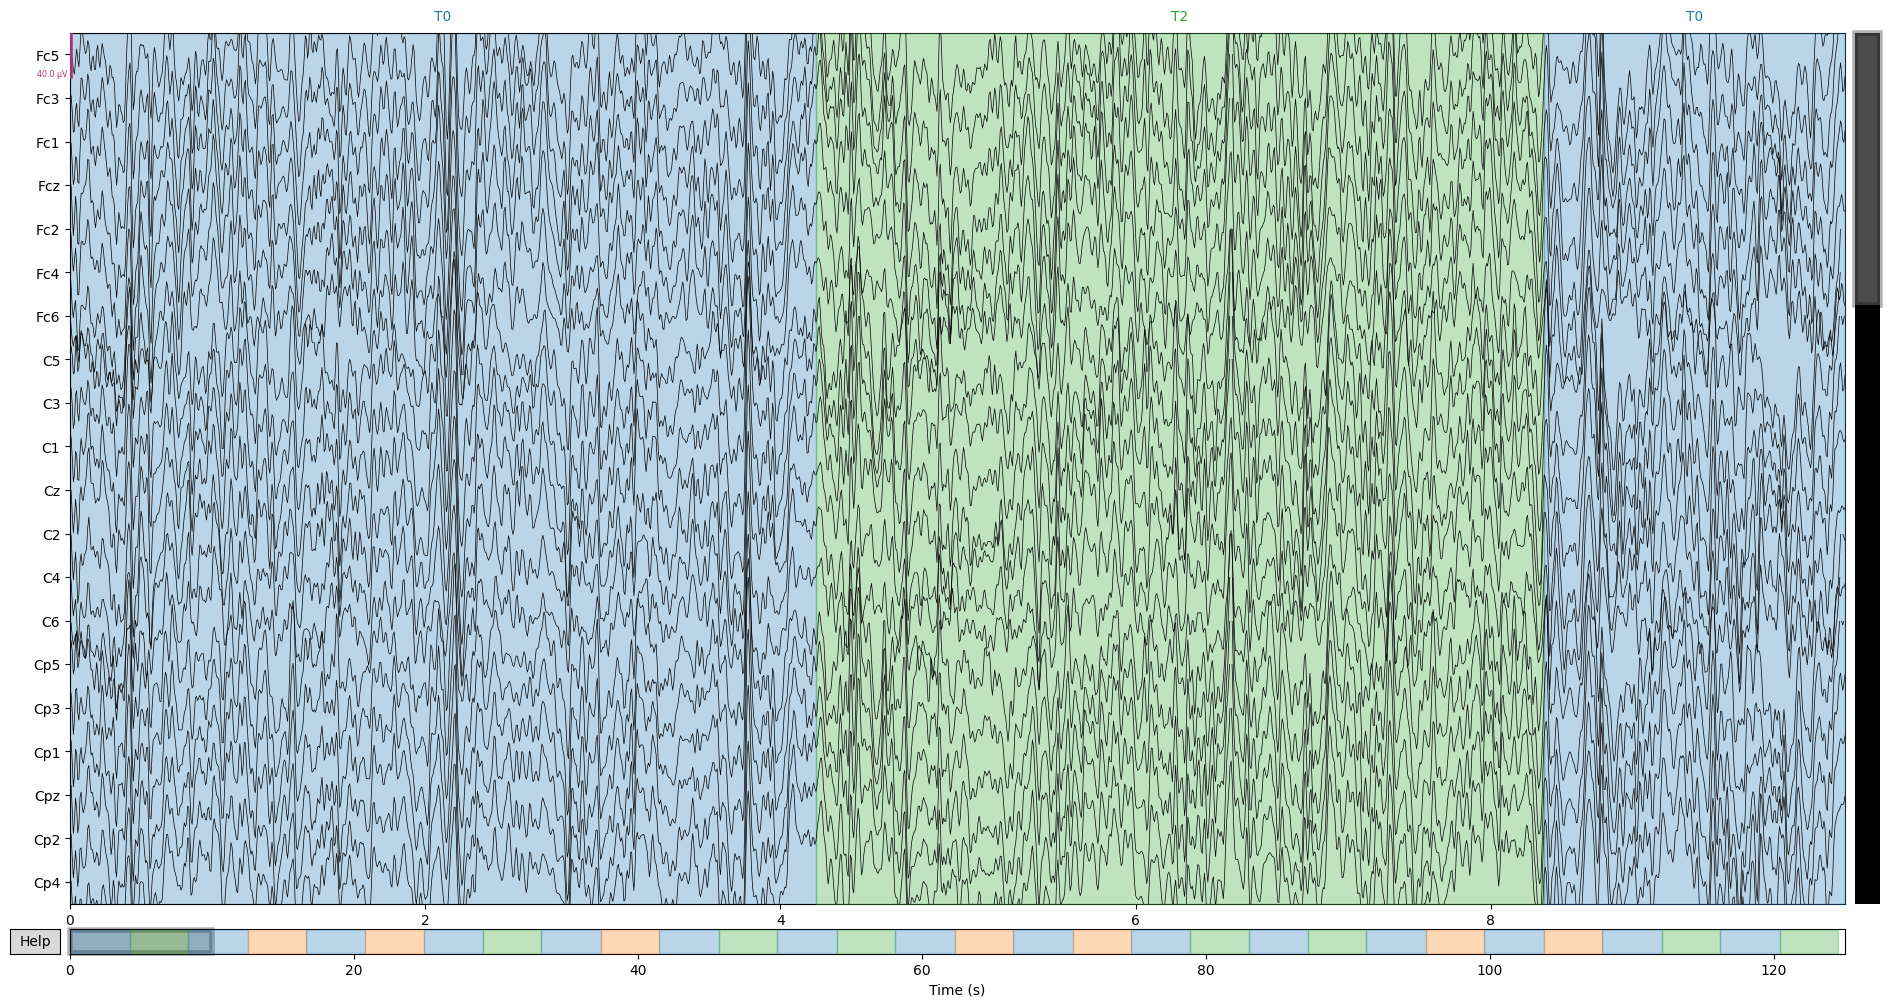

In [9]:
# mark the bad component (eye blink)
ica.exclude = [0]

# create cleaned EEG
raw_clean = raw.copy()
ica.apply(raw_clean)

# compare before vs after
raw.plot(title="Before Cleaning")
raw_clean.plot(title="After ICA Cleaning")